# Lesson 3: Text Data and Messy/Missing Data

To jump to the recap, click [here](#recap)

# Initial Setup

Import libraries and initialize variables to pick up where we left off in Lesson 2.

In [2]:
import pandas as pd

%matplotlib inline

In [3]:
weather_yvr = pd.read_csv('data/weather_yvr.csv')
weather_yvr['Relative Humidity (fraction)'] = weather_yvr['Relative Humidity (%)'] / 100
weather_yvr['Temperature (F)'] = 1.8 * weather_yvr['Temperature (C)'] + 32

# Text Data

What about text data like the `'Conditions'` column?

In [4]:
conditions = weather_yvr['Conditions']

In [5]:
conditions

0      Mainly Clear
1             Clear
2             Clear
3             Clear
4             Clear
5             Clear
6             Clear
7               Fog
8      Mainly Sunny
9     Partly Cloudy
10     Mainly Sunny
11    Partly Cloudy
12    Partly Cloudy
13    Partly Cloudy
14     Mainly Sunny
15     Mainly Sunny
16     Mainly Sunny
17     Mainly Sunny
18            Sunny
19     Mainly Sunny
20            Sunny
21            Sunny
22            Sunny
23            Clear
Name: Conditions, dtype: object

The Series `conditions` has a `dtype` of `object`

There are many repeated values in this Series.
- How many unique values are in the Series?
- How often does each value occur?
- What are the most common values?

We can use the `unique` method to list the unique values:

In [6]:
conditions.unique()

array(['Mainly Clear', 'Clear', 'Fog', 'Mainly Sunny', 'Partly Cloudy',
       'Sunny'], dtype=object)

We can use the function `len` to find the number of unique values:

In [7]:
len(conditions.unique())

6

Alternatively, we could use the `nunique` method to find the number of unique values:

In [8]:
conditions.nunique()

6

`value_counts` is a very handy method to quickly summarize a Series of text data and find the most common values:

In [146]:
conditions.value_counts()

Mainly Sunny     7
Clear            7
Sunny            4
Partly Cloudy    4
Mainly Clear     1
Fog              1
Name: Conditions, dtype: int64

We can assign the output of `value_counts` to a variable:

In [147]:
conditions_counts = conditions.value_counts()

In [148]:
conditions_counts

Mainly Sunny     7
Clear            7
Sunny            4
Partly Cloudy    4
Mainly Clear     1
Fog              1
Name: Conditions, dtype: int64

What data type do you think `conditions_counts` is?

In [149]:
type(conditions_counts)

pandas.core.series.Series

In [150]:
conditions_counts.index

Index(['Mainly Sunny', 'Clear', 'Sunny', 'Partly Cloudy', 'Mainly Clear',
       'Fog'],
      dtype='object')

- `conditions_counts` is a Series, with `dtype` of `int64`
- It has text labels as its index

We can plot `conditions_counts` as a vertical or horizontal bar chart. Here is a horizontal bar chart:

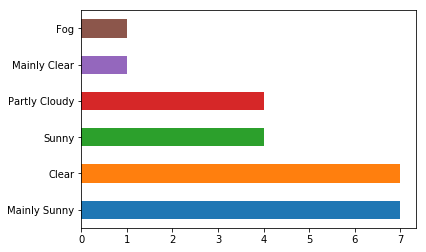

In [151]:
conditions_counts.plot(kind='barh');

# Messy Data

`pandas` makes it very easy to spot inconsistencies and missings in your data

In [10]:
messy = pd.read_csv('data/weather_YVR_messy.csv')
messy.head()

,Datetime,Hour of Day,Conditions,Temperature (C),Relative Humidity (%)
0,2018-05-21 22:00,22,Mainly Clear,14.8,75.0
1,2018-05-21 23:00,23,Clear,13.5,76.0
2,2018-05-22 0:00,0,clear,NaN,NaN
3,2018-05-22 1:00,1,Clear,12.9,84.0
4,2018-05-22 2:00,2,Clear,12.2,88.0


Let's check out `value_counts` for the `'Conditions'` column:

In [11]:
conditions_m = messy['Conditions']
conditions_m.value_counts()

Mainly Sunny       4
Clear              4
Sunny              3
Mainly sunny       2
 Partly Cloudy     2
Fog                1
Partly cloudy      1
Partly Cloudy      1
 Clear             1
clear              1
Mainly Sunny       1
Mainly Clear       1
Name: Conditions, dtype: int64

- We can see inconsistencies in capitalization and white space in these values
- Categories that should be the same (e.g. 'Mainly Sunny' and 'Mainly sunny') are counted as separate categories

The `unique` method can give some additional insights:

In [154]:
conditions_m.unique()

array(['Mainly Clear', 'Clear', 'clear', ' Clear ', nan, 'Fog',
       'Mainly Sunny', 'Partly Cloudy', 'Partly cloudy', ' Partly Cloudy',
       'Mainly sunny', 'Sunny', 'Mainly Sunny   '], dtype=object)

- Values are sorted so that similar values values are grouped together
- Extra leading / trailing white spaces are clearly visible
- Missing values appear as `nan`

We can see how many missing values there are with the `dropna` keyword argument to `value_counts`:

In [155]:
conditions_m.value_counts(dropna=False)

Mainly Sunny       4
Clear              4
Sunny              3
Mainly sunny       2
 Partly Cloudy     2
NaN                2
Fog                1
 Clear             1
clear              1
Partly Cloudy      1
Mainly Clear       1
Mainly Sunny       1
Partly cloudy      1
Name: Conditions, dtype: int64

We can apply the string methods we saw earlier to the `conditions_m` to quickly and easily standardize the Series
- Convert all values to lower case
- Strip extra leading and trailing white space from all values

In [12]:
conditions_lower = conditions_m.str.lower()
conditions_lower

0        mainly clear
1               clear
2               clear
3               clear
4               clear
5              clear 
6                 NaN
7                 fog
8        mainly sunny
9       partly cloudy
10       mainly sunny
11      partly cloudy
12      partly cloudy
13      partly cloudy
14       mainly sunny
15       mainly sunny
16       mainly sunny
17       mainly sunny
18              sunny
19    mainly sunny   
20              sunny
21                NaN
22              sunny
23              clear
Name: Conditions, dtype: object

In [13]:
conditions_clean = conditions_lower.str.strip()
conditions_clean

0      mainly clear
1             clear
2             clear
3             clear
4             clear
5             clear
6               NaN
7               fog
8      mainly sunny
9     partly cloudy
10     mainly sunny
11    partly cloudy
12    partly cloudy
13    partly cloudy
14     mainly sunny
15     mainly sunny
16     mainly sunny
17     mainly sunny
18            sunny
19     mainly sunny
20            sunny
21              NaN
22            sunny
23            clear
Name: Conditions, dtype: object

The previous two steps could be consolidated into a single line of code, using method chaining:

In [15]:
conditions_clean = conditions_m.str.lower().str.strip()
conditions_clean

0      mainly clear
1             clear
2             clear
3             clear
4             clear
5             clear
6               NaN
7               fog
8      mainly sunny
9     partly cloudy
10     mainly sunny
11    partly cloudy
12    partly cloudy
13    partly cloudy
14     mainly sunny
15     mainly sunny
16     mainly sunny
17     mainly sunny
18            sunny
19     mainly sunny
20            sunny
21              NaN
22            sunny
23            clear
Name: Conditions, dtype: object

In [158]:
conditions_clean.value_counts(dropna=False)

mainly sunny     7
clear            6
partly cloudy    4
sunny            3
NaN              2
fog              1
mainly clear     1
Name: Conditions, dtype: int64

We can add this standardized version of the `'Conditions'` column to our DataFrame and save to CSV:

In [16]:
messy['Conditions (standardized)'] = conditions_clean
messy.head()

,Datetime,Hour of Day,Conditions,Temperature (C),Relative Humidity (%),Conditions (standardized)
0,2018-05-21 22:00,22,Mainly Clear,14.8,75.0,mainly clear
1,2018-05-21 23:00,23,Clear,13.5,76.0,clear
2,2018-05-22 0:00,0,clear,NaN,NaN,clear
3,2018-05-22 1:00,1,Clear,12.9,84.0,clear
4,2018-05-22 2:00,2,Clear,12.2,88.0,clear


In [17]:
messy.to_csv('data/weather_YVR_cleaned.csv')

# Notebooks vs. Scripts

So far our workflow has been exploratory and interactive:

![](img/workflow0.png)

Fernando Perez (creator of IPython and Jupyter) calls this "humans in the loop"

- Write a bit of code
- Run the code
- Look at the output and see what's interesting, what needs to be done next, new questions to ask
- Write a bit more code
- and so on...

Sometimes, we might want to develop a more automated workflow for tasks we need to do over and over.

![](img/workflow1.png)

- Suppose we have a bunch of CSV files with messy weather data similar to the previous example
- We might want to repeat the above steps to process each file and save the standardized data to new files
- We could adapt the code from our notebook into a Python **script**

*See the extra section "Automating Tasks with Scripts" in `Lessons.ipynb` to learn how to create and run a script in Jupyter Lab*

# Automating Tasks with Scripts

### Writing a Script

- In Jupyter Lab, make sure you're in the main folder with your workshop files
- From the Launcher, click the "Text Editor" icon near the bottom
- A new text file is created&mdash;rename it from "untitled.txt" to "my_script.py"
- Copy the relevant lines of code from the messy data example in our notebook into "my_script.py". You'll want to include the following steps in your script:
  - Import `pandas` library
  - Read `'data/weather_YVR_messy.csv'` into a DataFrame
  - Apply the `strip` and `lower` string methods to the `'Conditions'` column of the DataFrame
  - You can add the cleaned data as a new column (e.g. `'Conditions (standardized)'`) or simply over-write the `'Conditions'` column with the cleaned data
  - Save the cleaned data to a new CSV file
- Press Ctrl-S (or Cmd-S on Mac) to make sure "my_script.py" is saved
- To see an example of what this would look like, check out "example_script.py"

### Running a Script

- From the Launcher in Jupyter Lab, click the "Terminal" icon near the bottom
- To the left of the command prompt, it will show what folder you're in
  - This might not be the workshop folder&mdash;you might be in your main user folder
- To navigate to your workshop folder, use the command `cd` followed by the relative path of the folder:
  - For example, on my computer, the terminal opens in the folder `C:\Users\jenfly`. From here, I use the command:
```
cd Projects\pydata-intro-workshop
```
  - This will change my working folder to be `C:\Users\jenfly\Projects\pydata-intro-workshop`, which will now appear to the left of the prompt
  - On your computer, you'll want to substitute the appropriate folder names, and if you're on a Mac, use forward slashes `/` instead of back slashes `\`
- Now that you're in the correct folder, run the following command at the prompt to run your script:
```
python my_script.py
```
- If everything worked, the script will execute with no error messages and the new CSV file with the cleaned data will have been created!
  - Incorporating `print` statements into your script can help you verify that it's running properly. For an example of this, try running the sample script:
```
python example_script.py
```

# Missing Data

- We saw from `conditions_m.value_counts(dropna=False)` that there are 2 missing values in `conditions_m`
- With any data that we're working with, it's good to know:
  - How many values are missing?
  - Where are the empty cells located in our DataFrame (or Series)?

We can use the `isnull` method to locate missing values

In [162]:
missing_conditions = conditions_m.isnull()
missing_conditions

0     False
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21     True
22    False
23    False
Name: Conditions, dtype: bool

- `missing_conditions` is a Series of Booleans, with `True` where the value in `conditions_m` is missing and `False` where it is not missing

- We can count the missings using the `sum` method:
  - Adds up all the values in the Series, treating `True` as 1 and `False` as 0

In [163]:
missing_conditions.sum()

2

The `isnull` method can be applied to an entire DataFrame:

In [18]:
missings = messy.isnull()
missings

,Datetime,Hour of Day,Conditions,Temperature (C),Relative Humidity (%),Conditions (standardized)
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,True,True,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,True,False
6,False,False,True,False,False,True
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


- We can find the number of missings in each column of the DataFrame with the `sum` method:
  - Computes the sum along each column

In [165]:
missings.sum()

Datetime                 0
Hour of Day              0
Conditions               2
Temperature (C)          2
Relative Humidity (%)    3
dtype: int64

If you need to fill your missing data, there are many tools that can be used, such as the `pandas` methods `fillna` and `interpolate`

<a id="recap"></a>
# Recap 3

### Counting Unique Values

Unique values in a Series: 
```
series.unique()
```

Number of unique values in a Series:
```
series.nunique()
```
or you could use `len(series.unique())`


Counts of each unique value in a Series
- Excluding missing values:
```
series.value_counts()
```
- Including missing values:
```
series.value_counts(dropna=False)
```

### Bar Charts

Plot a horizontal bar chart of a Series: 
```
series.plot(kind='barh')
```
For a vertical bar chart, use `kind='bar'`.

### Text Processing

Apply string methods to a text Series&mdash;use string methods in `series.str`:
```
series_lower = series.str.lower()
```
Apply multiple methods with method chaining:
```
series_lower_stripped = series.str.lower().str.strip()
```
  
  
### Missing Data

Locate missing values in a Series or DataFrame
```
data.isnull()
```

Calculate the total number of missing values in a Series, or in each column of a DataFrame: 
```
data.isnull().sum()
```

# Exercise 3

a) Familiarize yourself with the file `'data/weather_airport_stations.csv'` in the Jupyter Lab CSV viewer, and then read it into a new variable `weather_all`
- Display a random sampling of 10 rows
- How many rows and columns does the data have?
- What are the lowest and highest temperatures in the data?

b) How many unique Station Names and Datetimes are in the data? List the unique values.

c) What are the three most common Conditions and the three most common Wind Directions?

d) Which column has the most missing values? How many are missing in this column?

#### Bonus exercises

e) How many temperatures in `weather_all` are less than 0 and how many are greater than 20?
- *Hint: review the comparison operators in the "Booleans" section of `Lesson_0.ipynb`*

f) Work through the steps in the "Automating Tasks with Scripts" section in `Lesson_3.ipynb` to create and run a script in Jupyter Lab

a) Read the file `'data/weather_airport_stations.csv'` into a new variable `weather_all`.

- A random sampling of 10 rows of `weather_all`:

In [19]:
weather_all = pd.read_csv('data/weather_airport_stations.csv')
weather_all.sample(10)

,Datetime,Timezone,Hour of Day,Station ID,Station Name,Latitude,Longitude,Conditions,Temperature (C),Relative Humidity (%),Dew Point (C),Humidex (C),Pressure (kPa),Visibility (km),Wind Direction,Wind Speed (km/hr),Wind Chill (C)
182,2018-05-22 13:00,Canada/Mountain,13,YYC,Calgary Int'l Airport,51.12,-114.01,Mainly Sunny,23.2,31.0,5.0,NaN,101.6,64.0,S,18.0,NaN
241,2018-05-22 1:00,Canada/Central,1,YWG,Winnipeg Richardson Int'l Airport,49.91,-97.24,Clear,14.8,35.0,0.0,NaN,101.3,24.0,S,16.0,NaN
443,2018-05-22 13:00,Canada/Atlantic,13,YYG,Charlottetown Airport,46.29,-63.12,Mostly Cloudy,13.3,44.0,1.0,NaN,102.2,24.0,SSW,19.0,*
48,2018-05-21 22:00,Canada/Pacific,22,YXS,Prince George Airport,53.88,-122.68,Clear,10.3,76.0,6.0,NaN,101.5,16.0,N,4.0,NaN
235,2018-05-22 18:00,Canada/Central,18,YQR,Regina Int'l Airport,50.43,-104.67,Mostly Cloudy,21.2,53.0,11.0,23.0,101.4,24.0,SE,26.0,NaN
133,2018-05-22 14:00,Canada/Eastern,14,YFB,Iqaluit Airport,63.76,-68.56,Mostly Cloudy,-2.8,76.0,-7.0,NaN,100.8,19.0,NW,37.0,-11
54,2018-05-22 4:00,Canada/Pacific,4,YXS,Prince George Airport,53.88,-122.68,Clear,4.9,91.0,4.0,NaN,101.5,16.0,SSE,4.0,NaN
162,2018-05-22 17:00,Canada/Mountain,17,YEG,Edmonton Int'l Airport,53.31,-113.58,Partly Cloudy,27.3,21.0,4.0,NaN,101.4,24.0,E,11.0,NaN
446,2018-05-22 16:00,Canada/Atlantic,16,YYG,Charlottetown Airport,46.29,-63.12,Mostly Cloudy,15.9,30.0,-2.0,NaN,101.8,24.0,S,21.0,*
428,2018-05-22 22:00,Canada/Atlantic,22,YHZ,Halifax Stanfield Int'l Airport,44.88,-63.51,Cloudy,10.8,77.0,7.0,NaN,101.8,24.0,S,19.0,NaN


- Number of rows and columns:

In [167]:
weather_all.shape

(480, 17)

The data has 480 rows and 17 columns.

- Lowest and highest temperature:

In [20]:
weather_all['Temperature (C)'].describe()

count    479.000000
mean      13.974530
std        7.892156
min       -7.100000
25%       10.000000
50%       14.400000
75%       19.150000
max       28.600000
Name: Temperature (C), dtype: float64

The lowest temperature is -7.1 C and the highest is 28.6 C.

b) How many unique Station Names and Datetimes are in the data? List the unique values.

In [169]:
station_names_unique = weather_all['Station Name'].unique()
print(station_names_unique)
print(len(station_names_unique))

["Vancouver Int'l Airport" "Victoria Int'l Airport"
 'Prince George Airport' 'Whitehorse Airport' 'Yellowknife Airport'
 'Iqaluit Airport' "Edmonton Int'l Airport" "Calgary Int'l Airport"
 "Saskatoon Diefenbaker Int'l Airport" "Regina Int'l Airport"
 "Winnipeg Richardson Int'l Airport" 'Thunder Bay Airport'
 "Toronto Pearson Int'l Airport" "Ottawa Macdonald-Cartier Int'l Airport"
 "Montreal-Trudeau Int'l Airport" "Quebec Lesage Int'l Airport"
 "Fredericton Int'l Airport" "Halifax Stanfield Int'l Airport"
 'Charlottetown Airport' "St. John's Int'l Airport"]
20


In [170]:
datetime_unique = weather_all['Datetime'].unique()
print(datetime_unique)
print(weather_all['Datetime'].nunique())

['2018-05-21 22:00' '2018-05-21 23:00' '2018-05-22 0:00' '2018-05-22 1:00'
 '2018-05-22 2:00' '2018-05-22 3:00' '2018-05-22 4:00' '2018-05-22 5:00'
 '2018-05-22 6:00' '2018-05-22 7:00' '2018-05-22 8:00' '2018-05-22 9:00'
 '2018-05-22 10:00' '2018-05-22 11:00' '2018-05-22 12:00'
 '2018-05-22 13:00' '2018-05-22 14:00' '2018-05-22 15:00'
 '2018-05-22 16:00' '2018-05-22 17:00' '2018-05-22 18:00'
 '2018-05-22 19:00' '2018-05-22 20:00' '2018-05-22 21:00'
 '2018-05-22 22:00' '2018-05-22 23:00' '2018-05-23 0:00' '2018-05-23 1:00'
 '2018-05-22 2:30' '2018-05-22 3:30' '2018-05-22 4:30' '2018-05-22 5:30'
 '2018-05-22 6:30' '2018-05-22 7:30' '2018-05-22 8:30' '2018-05-22 9:30'
 '2018-05-22 10:30' '2018-05-22 11:30' '2018-05-22 12:30'
 '2018-05-22 13:30' '2018-05-22 14:30' '2018-05-22 15:30'
 '2018-05-22 16:30' '2018-05-22 17:30' '2018-05-22 18:30'
 '2018-05-22 19:30' '2018-05-22 20:30' '2018-05-22 21:30'
 '2018-05-22 22:30' '2018-05-22 23:30' '2018-05-23 0:30' '2018-05-23 1:30']
52


There are 20 unique station names and 52 unique datetimes.

c) What are the three most common Conditions and the three most common Wind Directions?

In [171]:
weather_all['Conditions'].value_counts()

Mostly Cloudy                          148
Partly Cloudy                           90
Mainly Sunny                            48
Mainly Clear                            37
Clear                                   35
Sunny                                   34
Cloudy                                  31
Light Rain                              16
Light Snow                              15
Mist                                    11
Light Drizzle                            5
Fog                                      4
Light Rainshower                         4
Thunderstorm with light rainshowers      1
Name: Conditions, dtype: int64

In [172]:
weather_all['Wind Direction'].value_counts()

S      67
SSW    62
SSE    44
N      38
WSW    34
SW     32
E      26
SE     26
NNW    21
NW     20
W      19
ESE    18
WNW    17
ENE    15
NE     15
NNE    12
Name: Wind Direction, dtype: int64

- Three most common Conditions: Mostly Cloudy, Partly Cloudy, Mainly Sunny
- Three most common Wind Directions: S, SSW, SSE

d) Which column has the most missing values? How many are missing in this column?

In [173]:
weather_all.isnull().sum()

Datetime                   0
Timezone                   0
Hour of Day                0
Station ID                 0
Station Name               0
Latitude                   0
Longitude                  0
Conditions                 1
Temperature (C)            1
Relative Humidity (%)      1
Dew Point (C)              2
Humidex (C)              446
Pressure (kPa)             1
Visibility (km)            1
Wind Direction            14
Wind Speed (km/hr)         1
Wind Chill (C)           432
dtype: int64

The 'Humidex (C)' column has the most missing values (446).

e) How many temperatures are less than 0 and how many are greater than 20?

In [21]:
temp = weather_all['Temperature (C)']

In [22]:
temp_lt_0 = temp < 0
temp_lt_0.head()

0    False
1    False
2    False
3    False
4    False
Name: Temperature (C), dtype: bool

In [23]:
temp_lt_0.sum()

25

There are 25 temperatures less than 0 C.

In [25]:
temp_gt_20 = temp > 20
temp_gt_20.head()

0    False
1    False
2    False
3    False
4    False
Name: Temperature (C), dtype: bool

In [26]:
temp_gt_20.sum()

107

There are 107 temperatures greater than 20 C.

What happens if we try to display the entire DataFrame `weather_all` in our notebook?

In [178]:
weather_all

,Datetime,Timezone,Hour of Day,Station ID,Station Name,Latitude,Longitude,Conditions,Temperature (C),Relative Humidity (%),Dew Point (C),Humidex (C),Pressure (kPa),Visibility (km),Wind Direction,Wind Speed (km/hr),Wind Chill (C)
0,2018-05-21 22:00,Canada/Pacific,22,YVR,Vancouver Int'l Airport,49.19,-123.18,Mainly Clear,14.8,75.0,10.0,NaN,101.6,48.0,N,5.0,NaN
1,2018-05-21 23:00,Canada/Pacific,23,YVR,Vancouver Int'l Airport,49.19,-123.18,Clear,13.5,76.0,9.0,NaN,101.6,32.0,NaN,0.0,NaN
2,2018-05-22 0:00,Canada/Pacific,0,YVR,Vancouver Int'l Airport,49.19,-123.18,Clear,13.1,77.0,9.0,NaN,101.6,32.0,E,11.0,NaN
3,2018-05-22 1:00,Canada/Pacific,1,YVR,Vancouver Int'l Airport,49.19,-123.18,Clear,12.9,84.0,10.0,NaN,101.6,32.0,E,8.0,NaN
4,2018-05-22 2:00,Canada/Pacific,2,YVR,Vancouver Int'l Airport,49.19,-123.18,Clear,12.2,88.0,10.0,NaN,101.6,32.0,E,12.0,NaN
5,2018-05-22 3:00,Canada/Pacific,3,YVR,Vancouver Int'l Airport,49.19,-123.18,Clear,12.0,87.0,10.0,NaN,101.6,32.0,E,9.0,NaN
6,2018-05-22 4:00,Canada/Pacific,4,YVR,Vancouver Int'l Airport,49.19,-123.18,Clear,11.9,88.0,10.0,NaN,101.6,32.0,N,2.0,NaN
7,2018-05-22 5:00,Canada/Pacific,5,YVR,Vancouver Int'l Airport,49.19,-123.18,Fog,10.4,97.0,10.0,NaN,101.6,48.0,N,2.0,NaN
8,2018-05-22 6:00,Canada/Pacific,6,YVR,Vancouver Int'l Airport,49.19,-123.18,Mainly Sunny,11.0,91.0,10.0,NaN,101.5,48.0,NaN,0.0,NaN
9,2018-05-22 7:00,Canada/Pacific,7,YVR,Vancouver Int'l Airport,49.19,-123.18,Partly Cloudy,13.0,92.0,12.0,NaN,101.6,48.0,N,2.0,NaN


For large DataFrames, the first 30 and last 30 rows are displayed, with a `...` in between